In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv("startupsdata.csv")
data.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,NewYork,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,NewYork,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [36]:
data = pd.get_dummies(data,columns=["State"])
data

,RDSpend,Administration,MarketingSpend,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RDSpend           50 non-null     float64
 1   Administration    50 non-null     float64
 2   MarketingSpend    50 non-null     float64
 3   Profit            50 non-null     float64
 4   State_California  50 non-null     uint8  
 5   State_Florida     50 non-null     uint8  
 6   State_NewYork     50 non-null     uint8  
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [38]:
data.isna().sum()

RDSpend             0
Administration      0
MarketingSpend      0
Profit              0
State_California    0
State_Florida       0
State_NewYork       0
dtype: int64

In [39]:
data.corr()

,RDSpend,Administration,MarketingSpend,Profit,State_California,State_Florida,State_NewYork
RDSpend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
MarketingSpend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_NewYork,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


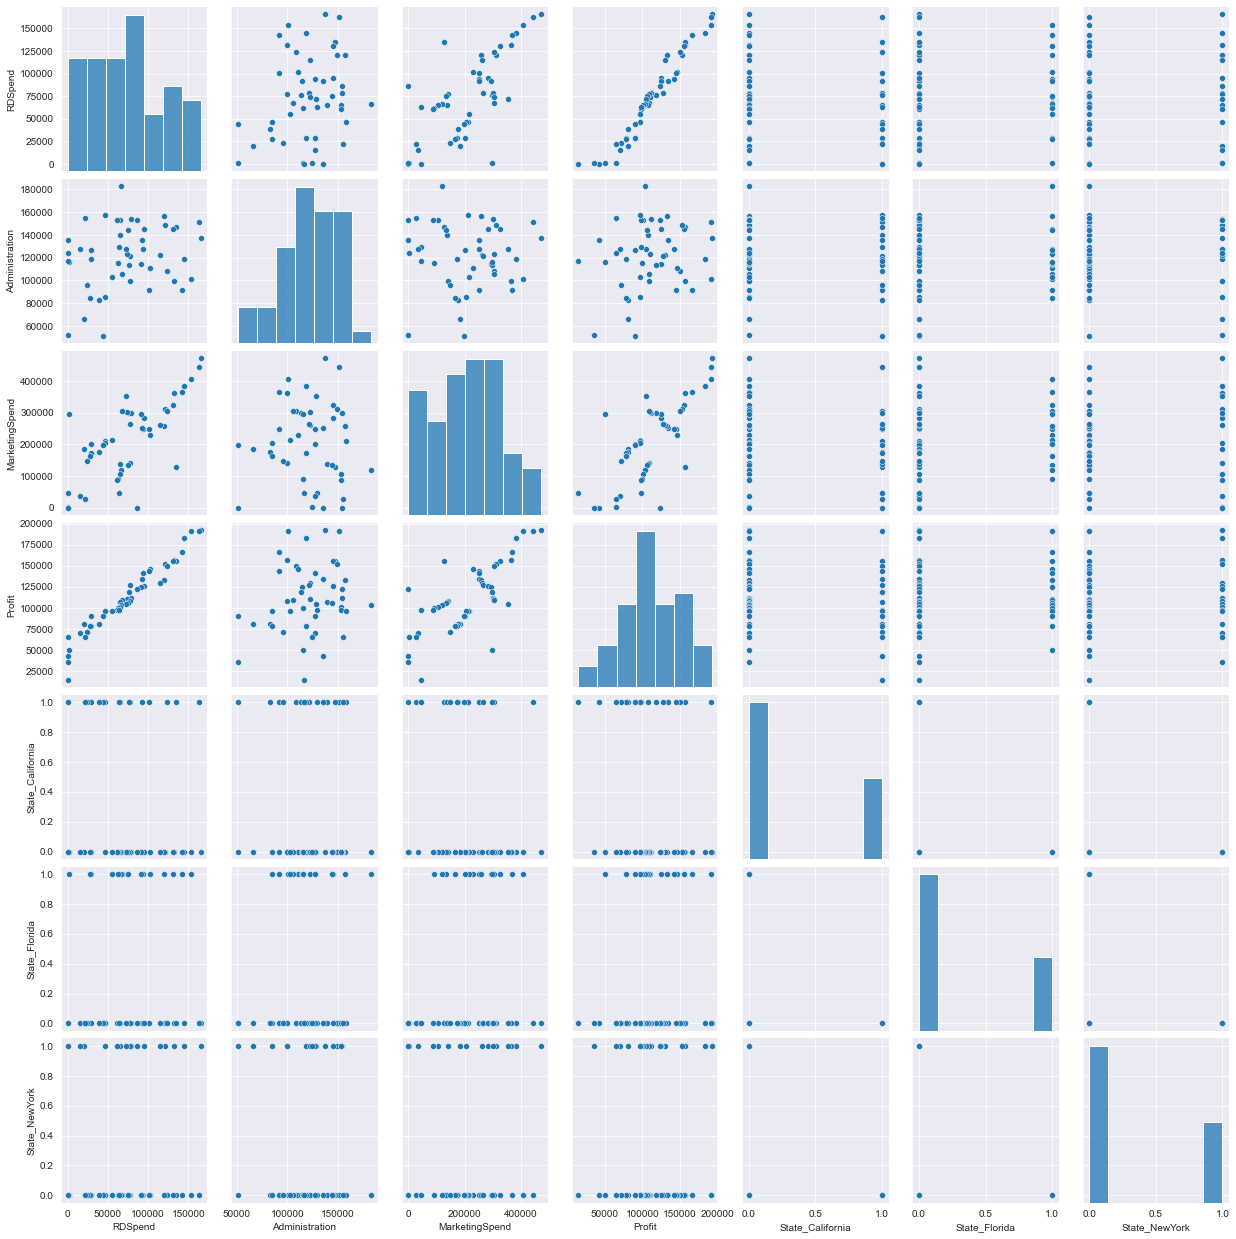

In [40]:
sns.set_style(style = "darkgrid")
sns.pairplot(data)

In [41]:
model = smf.ols('Profit~RDSpend+Administration+MarketingSpend+State_California+State_Florida+State_NewYork',data=data).fit()

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           1.34e-27
Time:                        18:36:05   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RDSpend              0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
MarketingSpend       0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_NewYork     1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     4.47e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.95e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
ml_RD = smf.ols("Profit~RDSpend",data = data).fit()
print(ml_RD.tvalues,'\n',ml_RD.pvalues)
ml_RD.summary()

Intercept    19.320288
RDSpend      29.151139
dtype: float64 
 Intercept    2.782697e-24
RDSpend      3.500322e-32
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           3.50e-32
Time:                        18:36:06   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RDSpend        0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
ml_M = smf.ols("Profit~MarketingSpend",data = data).fit()
print(ml_M.tvalues,'\n',ml_M.pvalues)
ml_M.summary()

Intercept         7.808356
MarketingSpend    7.802657
dtype: float64 
 Intercept         4.294735e-10
MarketingSpend    4.381073e-10
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           4.38e-10
Time:                        18:36:06   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MarketingSpend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
ml_RDM = smf.ols("Profit~RDSpend+MarketingSpend",data = data).fit()
print(ml_RDM.tvalues,'\n',ml_RDM.pvalues)
ml_RDM.summary()

Intercept         17.463582
RDSpend           19.265555
MarketingSpend     1.927052
dtype: float64 
 Intercept         3.504062e-22
RDSpend           6.040433e-24
MarketingSpend    6.003040e-02
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           2.16e-31
Time:                        18:36:07   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RDSpend            0.7966      0.041     19.266      0.000       0.713       0.880
MarketingSpend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
rsq_rd = smf.ols("RDSpend~Administration+MarketingSpend",data = data).fit().rsquared
vif_rd = 1/(1-rsq_rd)

In [47]:
rsq_a = smf.ols("Administration~RDSpend+MarketingSpend",data = data).fit().rsquared
vif_a = 1/(1-rsq_a)

In [48]:
rsq_m = smf.ols("MarketingSpend~Administration+RDSpend",data = data).fit().rsquared
vif_m = 1/(1-rsq_m)

In [101]:
d1 = {'Variables':['RDSpend','Administration','MarketingSpend'],'VIF':[vif_rd,vif_a,vif_m]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDSpend,2.468903
1,Administration,1.175091
2,MarketingSpend,2.326773


In [50]:
model.resid

0      -128.741365
1      2720.739894
2      8774.203265
3      9317.013809
4     -6089.193819
5     -6482.687120
6     -1976.782789
7     -4403.044651
8       577.026673
9     -5069.702529
10    10457.307408
11     8730.799217
12    12302.602193
13     6876.101014
14   -17091.732777
15   -16226.595515
16    10138.855472
17    -4715.039933
18    -4882.825742
19     7182.671589
20     1903.295561
21    -5888.485088
22    -4481.055137
23    -1389.806104
24    -4742.333453
25     5204.071081
26    -5031.761170
27    -9271.494028
28     1463.792613
29     -716.402030
30      308.579462
31     -133.736321
32    -1560.396605
33    -1282.438947
34     7738.095839
35     6059.500395
36    15285.097137
37      371.437779
38    11622.538393
39    -2679.216039
40     3477.163826
41     2842.518953
42      922.496288
43     9658.711782
44      615.182788
45    17337.715292
46    -6782.242679
47    -3908.502003
48   -13449.663082
49   -33503.638790
dtype: float64

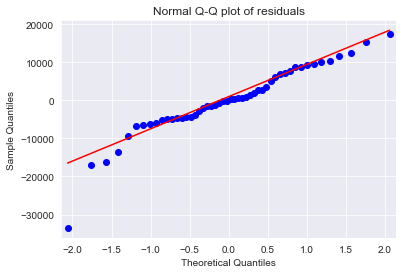

In [55]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line = "q")
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [56]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [57]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

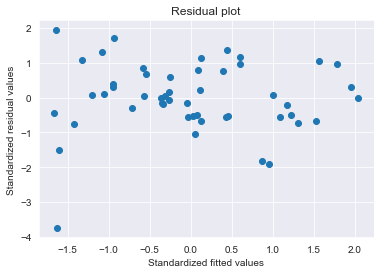

In [58]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual plot")
plt.xlabel("Standardized fitted values")
plt.ylabel("Standardized residual values")
plt.show()

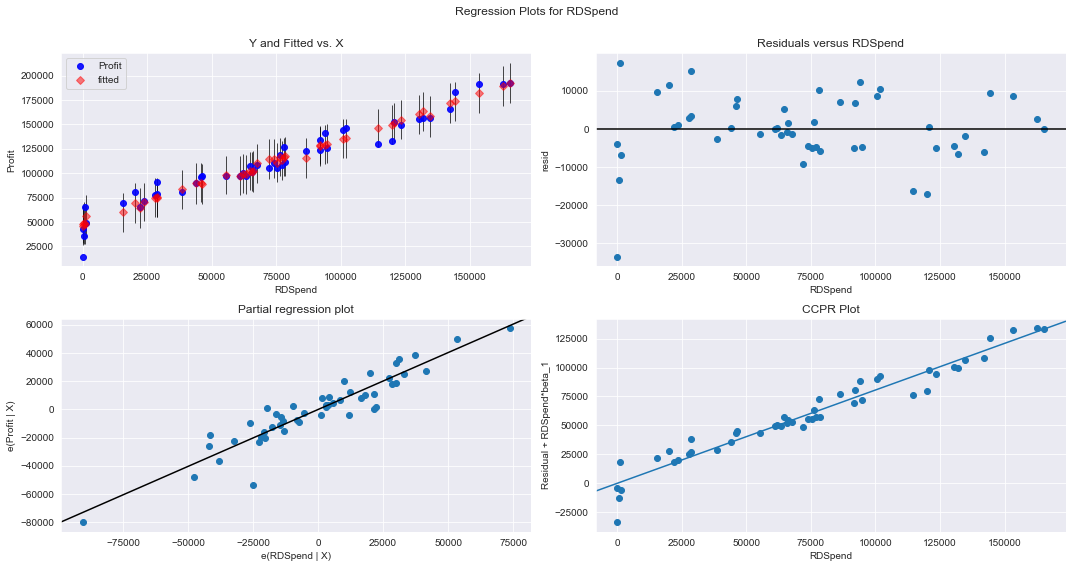

In [59]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"RDSpend",fig=fig)
plt.show()

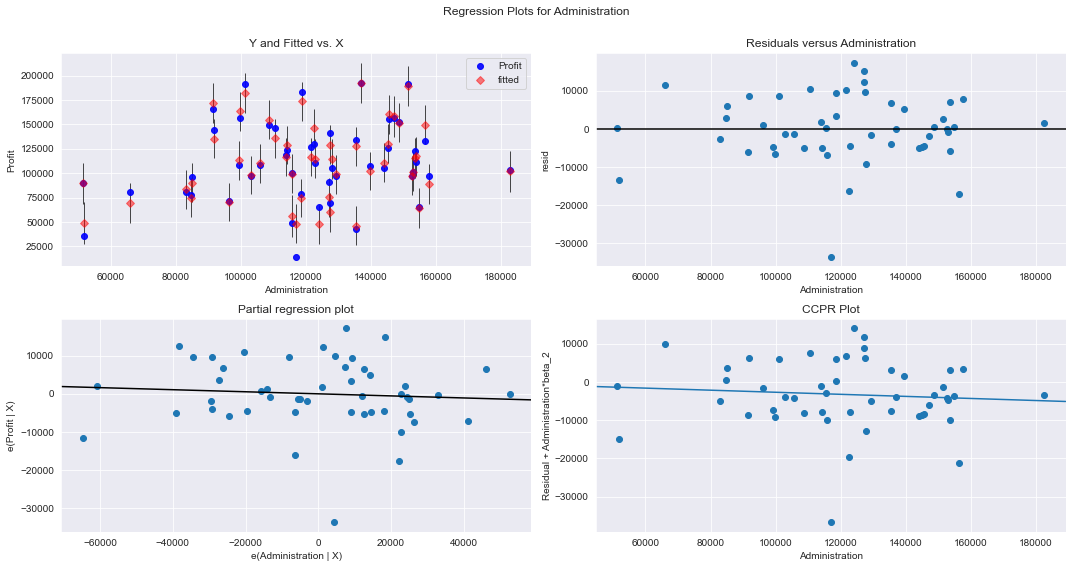

In [60]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Administration",fig=fig)
plt.show()

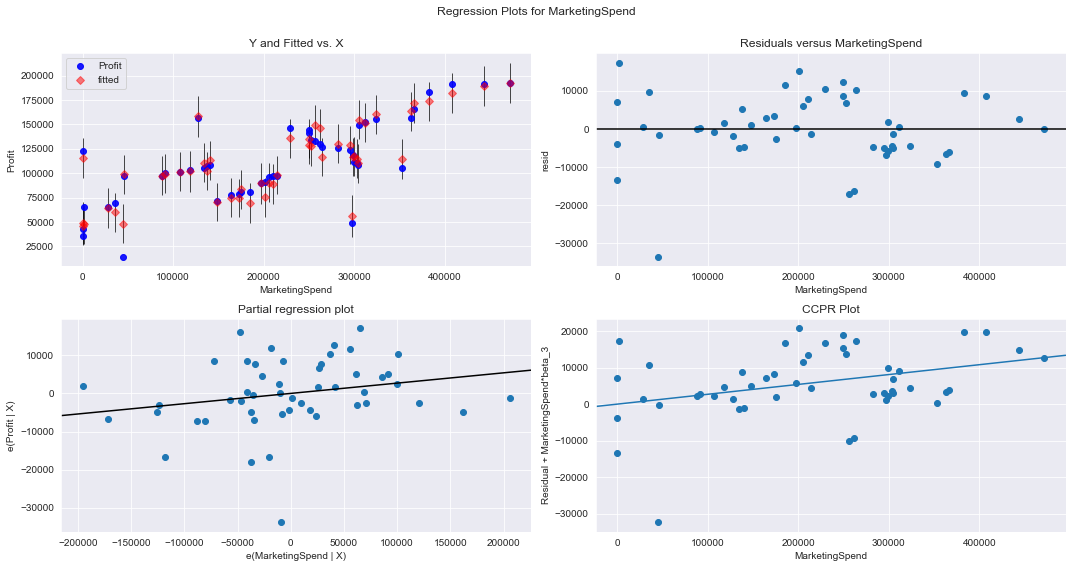

In [61]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"MarketingSpend",fig=fig)
plt.show()

In [62]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

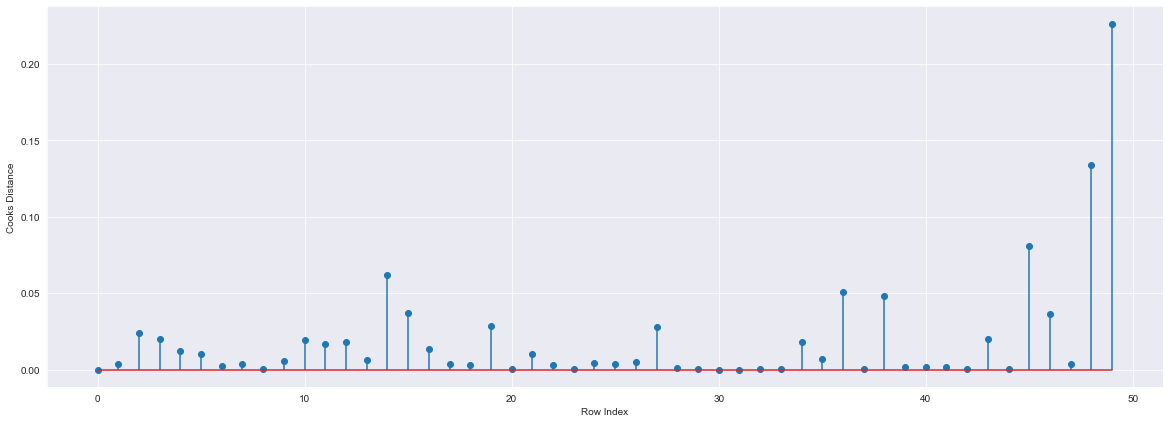

In [63]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,4))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [64]:
(np.argmax(c),np.max(c))

(49, 0.2262509450150927)

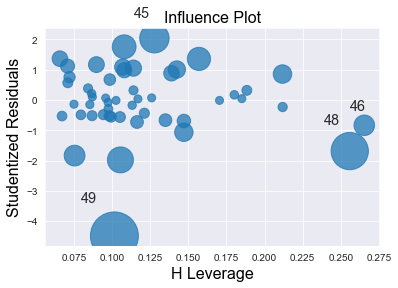

In [65]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [66]:
data.shape

(50, 7)

In [67]:
K=data.shape[1]
n=data.shape[0]
leverage_cutoff = 3*((K+1)/n)
leverage_cutoff

0.48

From the above plot,it is evident that data point 48  is the high influencer


In [68]:
data[data.index.isin([48])]

,RDSpend,Administration,MarketingSpend,Profit,State_California,State_Florida,State_NewYork
48,542.05,51743.15,0.0,35673.41,0,0,1


In [69]:
data.head()

,RDSpend,Administration,MarketingSpend,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [70]:
data_new = pd.read_csv("startupsdata.csv")

In [71]:
data1=data_new.drop(data_new.index[[48]],axis = 0).reset_index()
data1

,index,RDSpend,Administration,MarketingSpend,State,Profit
0,0,165349.20,136897.80,471784.10,NewYork,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,NewYork,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,NewYork,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,NewYork,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [72]:
data1 = data1.drop(["index"],axis=1)

In [73]:
data1

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,NewYork,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,NewYork,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,NewYork,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,NewYork,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [74]:
final_ml_M = smf.ols("Profit~Administration+MarketingSpend",data = data1).fit()

In [75]:
final_ml_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     31.53
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           2.38e-09
Time:                        18:37:38   Log-Likelihood:                -566.08
No. Observations:                  49   AIC:                             1138.
Df Residuals:                      46   BIC:                             1144.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.073e+04      2e+04      1.035      0.306   -1.96e+04    6.11e+04
Administration     0.3206      0.143      2.238      0.030       0.032       0.609
MarketingSpend     0.2483      0.032      7.851      0.000       0.185       0.312
==============================================================================
Omnibus:                        6.225   Durbin-Watson:                   1.205
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.874
Skew:                          -0.510   Prob(JB):                       0.0530
Kurtosis:                       4.356   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
(final_ml_M.rsquared,final_ml_M.aic)

(0.5782440274175522, 1138.1660613787217)

In [77]:
final_ml_RD = smf.ols("Profit~RDSpend+Administration",data = data1).fit()
final_ml_RD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     421.7
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           2.60e-30
Time:                        18:37:40   Log-Likelihood:                -514.67
No. Observations:                  49   AIC:                             1035.
Df Residuals:                      46   BIC:                             1041.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept           6e+04   6341.594      9.462      0.000    4.72e+04    7.28e+04
RDSpend            0.8526      0.030     28.840      0.000       0.793       0.912
Administration    -0.0860      0.050     -1.704      0.095      -0.188       0.016
==============================================================================
Omnibus:                       19.685   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.713
Skew:                          -1.139   Prob(JB):                     1.07e-08
Kurtosis:                       6.577   Cond. No.                     7.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
(final_ml_RD.rsquared,final_ml_RD.aic)

(0.9482776031402543, 1035.337798019223)

In [82]:
model_influence_RD=final_ml_RD.get_influence()
(c_RD,_) = model_influence_RD.cooks_distance

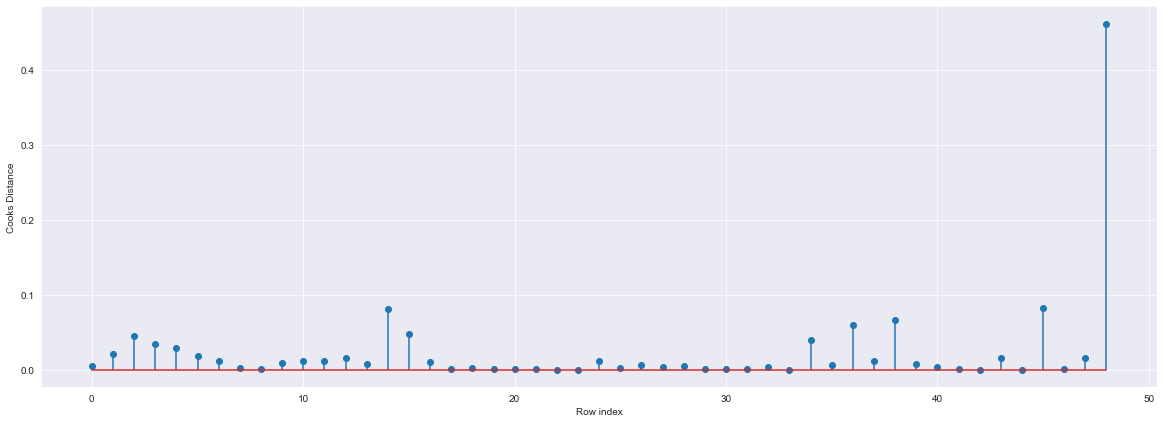

In [83]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c_RD,3));
plt.xlabel("Row index")
plt.ylabel("Cooks Distance");

In [84]:
(np.argmax(c_RD),np.max(c_RD))

(48, 0.46176335315601896)

In [85]:
data2=data1.drop(data1.index[[48]],axis=0)

In [86]:
data2

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,NewYork,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,NewYork,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,NewYork,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,NewYork,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [87]:
data3=data2.reset_index()

In [88]:
data4=data3.drop(['index'],axis=1)
data4

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,NewYork,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,NewYork,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,NewYork,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,NewYork,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Since the value is <1 , we can stop the diagnostic process and finalize the model

In [92]:
final_ml_RD=smf.ols("Profit~RDSpend+Administration",data = data2).fit()
final_ml_RD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     559.7
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           1.62e-32
Time:                        18:38:34   Log-Likelihood:                -494.17
No. Observations:                  48   AIC:                             994.3
Df Residuals:                      45   BIC:                             1000.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.273e+04   5182.210     12.106      0.000    5.23e+04    7.32e+04
RDSpend            0.8229      0.025     33.245      0.000       0.773       0.873
Administration    -0.0837      0.041     -2.041      0.047      -0.166      -0.001
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.396
Skew:                           0.073   Prob(JB):                        0.820
Kurtosis:                       2.580   Cond. No.                     7.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
(final_ml_RD.rsquared,final_ml_RD.aic)

(0.9613542664192156, 994.3402293693792)

In [94]:
new_data=pd.DataFrame({'RDSpend':168350,"Administration":146800,"MarketingSpend":491790},index=[1])
new_data

,RDSpend,Administration,MarketingSpend
1,168350,146800,491790


In [95]:
final_ml_RD.predict(new_data)

1    188980.783194
dtype: float64

In [96]:
final_ml_RD.predict(data_new.iloc[0:5,])

0    187340.464760
1    183863.887641
2    180534.893139
3    171604.420272
4    172024.525403
dtype: float64

In [97]:
data_new.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,NewYork,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,NewYork,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [99]:
pred_y = final_ml_RD.predict(data_new)

In [100]:
pred_y

0     187340.464760
1     183863.887641
2     180534.893139
3     171604.420272
4     172024.525403
5     162900.562346
6     161186.859951
7     157773.804230
8     149478.810965
9     155129.052073
10    137340.484516
11    137893.497963
12    129316.175141
13    127091.776815
14    148330.209061
15    146711.212589
16    116751.658144
17    128482.338848
18    128676.601621
19    120997.283316
20    115951.175950
21    114367.406052
22    113345.516501
23    109453.840824
24    117822.625592
25    104263.757333
26    112655.711034
27    111367.236568
28    101797.017449
29    103909.390855
30    104068.445347
31    100259.360216
32    104095.492902
33     99772.679489
34     87736.121850
35     93479.452221
36     75684.497649
37     94706.610663
38     73860.287242
39     87517.154120
40     76471.551735
41     78595.585990
42     74135.495344
43     64829.306456
44     68023.684692
45     53162.943051
46     54120.360089
47     51395.923989
48     58848.503761
49     52940.095626
